Changed working directory to /home/eudald/Escriptori/doctorat/connectome
Project root: /home/eudald/Escriptori/doctorat/connectome
Original connections: 15091983, Random connections: 16760468
Original synapses: 54492922, Random synapses: 22087898

Distance statistics (sample size: 15091983 original, 16760468 random):
Original mean distance: 24536.96, median: 20229.70
Random mean distance: 63669.16, median: 57864.05
Original total wiring: 1401193994905.71
Random total wiring: 1400777400731.14
Wiring ratio (random/original): 0.9997


ValueError: num must be an integer with 1 <= num <= 2, not 3

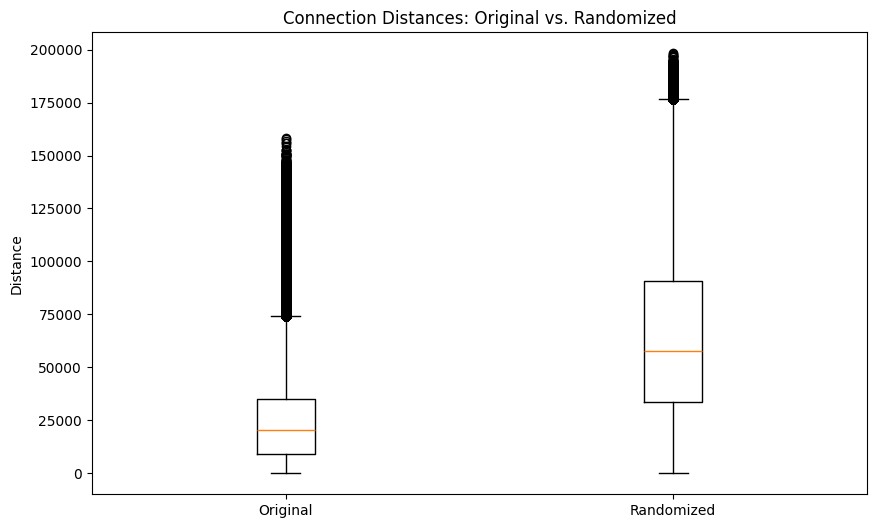

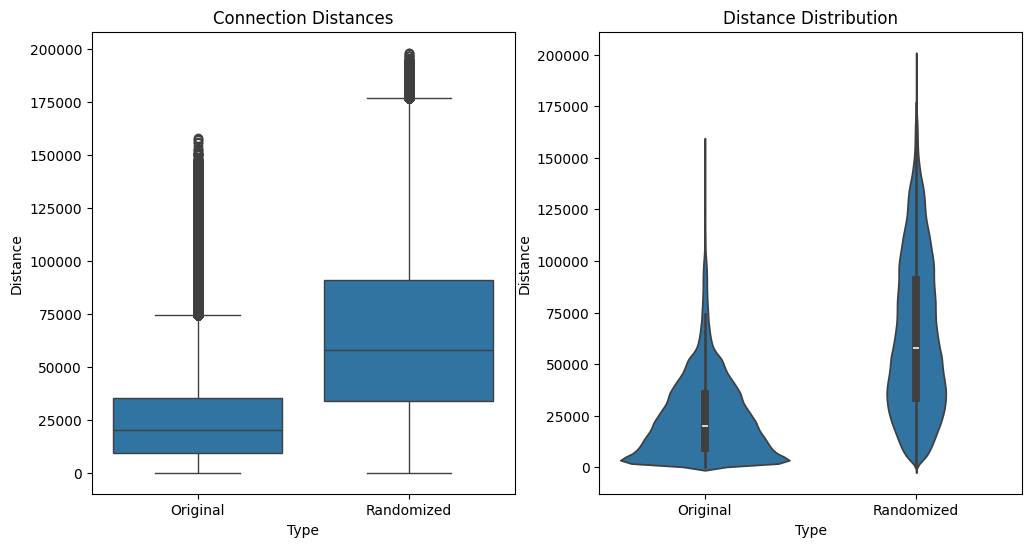

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from notebooks.visualization.activations_funcs import get_all_connections
from paths import PROJECT_ROOT

from utils.shuffle_connections import add_coords, load_neuron_coordinates

data_dir = os.path.join(PROJECT_ROOT, "new_data")
# Load data
neuron_position_data = load_neuron_coordinates()
connections_dict = get_all_connections()
biological = connections_dict["Biological"]
random_pruned = connections_dict["Random Pruned"]


# Basic stats
print(
    f"Original connections: {len(biological)}, Random connections: {len(random_pruned)}"
)
print(
    f"Original synapses: {biological['syn_count'].sum()}, Random synapses: {random_pruned['syn_count'].sum()}"
)


# Add coordinates to both samples
orig_with_coords = add_coords(biological, neuron_position_data)
random_with_coords = add_coords(random_pruned, neuron_position_data)


# Calculate distances in a vectorized way
def calculate_distances(df):
    # Get coordinate arrays
    pre_coords = df[["pre_x", "pre_y", "pre_z"]].to_numpy()
    post_coords = df[["post_x", "post_y", "post_z"]].to_numpy()

    # Calculate distances
    distances = np.linalg.norm(pre_coords - post_coords, axis=1)

    # Calculate wiring length (distance * synapse count)
    wiring_length = distances * df["syn_count"].to_numpy()

    return distances, wiring_length


# Calculate distances for both datasets
orig_distances, orig_wiring = calculate_distances(orig_with_coords)
random_distances, random_wiring = calculate_distances(random_with_coords)

# Print summary statistics
print(
    f"\nDistance statistics (sample size: {len(orig_distances)} original, {len(random_distances)} random):"
)
print(
    f"Original mean distance: {np.mean(orig_distances):.2f}, median: {np.median(orig_distances):.2f}"
)
print(
    f"Random mean distance: {np.mean(random_distances):.2f}, median: {np.median(random_distances):.2f}"
)
print(f"Original total wiring: {np.sum(orig_wiring):.2f}")
print(f"Random total wiring: {np.sum(random_wiring):.2f}")
print(
    f"Wiring ratio (random/original): {np.sum(random_wiring)/np.sum(orig_wiring):.4f}"
)

# Create a boxplot comparing the distributions
plt.figure(figsize=(10, 6))
data = [orig_distances, random_distances]
labels = ["Original", "Randomized"]

plt.boxplot(data, tick_labels=labels)
plt.ylabel("Distance")
plt.title("Connection Distances: Original vs. Randomized")
plt.savefig("distance_boxplot.png")

# Create a more detailed plot with seaborn
plt.figure(figsize=(12, 6))
df_combined = pd.DataFrame(
    {
        "Distance": np.concatenate([orig_distances, random_distances]),
        "Type": ["Original"] * len(orig_distances)
        + ["Randomized"] * len(random_distances),
    }
)

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x="Type", y="Distance", data=df_combined)
plt.title("Connection Distances")

# Violin plot (shows distribution better)
plt.subplot(1, 2, 2)
sns.violinplot(x="Type", y="Distance", data=df_combined)
plt.title("Distance Distribution")

# Bar plot of mean distance with error bars
plt.subplot(1, 2, 3)
sns.barplot(x="Type", y="Distance", data=df_combined, ci="sd")
plt.title("Mean Distance with Error Bars")

# Show the plots
plt.tight_layout()

In [ ]:
# Bar plot of mean distance with error bars
sns.barplot(x="Type", y="Distance", data=df_combined, errorbar="sd")
plt.title("Mean Distance with Error Bars")

# Show the plots
plt.tight_layout()